nbextensions

In [ ]:
#!pip install -U gensim

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathanamar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data, cols = ['question1', 'question2']):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in cols:
        data[col] = data[col].apply(clean_sentence)
    
    return data

def build_corpus(data, cols = ['question1', 'question2']):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in cols:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [7]:
data = pd.read_csv('train.csv').sample(50000, random_state=23)
data.head(15)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,Is sex necessary in a relationship?,Why is sex important in a good relationship?,1
181001,181001,277377,277378,What are the most inspiring start up stories?,What are the most inspirational stories ever?,0
294691,294691,150129,93109,What is your best way to do digital marketing?,What are the best unique ways to do Digital Ma...,1
104145,104145,171986,171987,What is the best way to grow a Facebook fan page?,How do I get more followers on my Facebook page?,1
357893,357893,487310,487311,Suppose Host A sends two TCP segments back to ...,Suppose Host A sends two TCP segments back to ...,1
105590,105590,18108,29371,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1
7908,7908,15433,15434,"How is it possible to disable FaceTime's ""End ...",Does FaceTime work in China?,0
31614,31614,58274,58275,Is there any Agencies who can fulfil our Sex F...,Do girls like threesomes with two guys?,0
153346,153346,240718,240719,What are some signs of being mentally weak?,Is moving on a sign of weakness?,0
179559,179559,275493,275494,What is different in Quora?,What's different on Quora?,1


In [8]:
data = clean_dataframe(data)
data.head(15)


,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex necessary relationship,sex important good relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories ever,0
294691,294691,150129,93109,best way digital marketing,best unique ways digital marketing,1
104145,104145,171986,171987,best way grow facebook fan page,get followers facebook page,1
357893,357893,487310,487311,suppose host sends two tcp segments back back ...,suppose host sends two tcp segments back back ...,1
105590,105590,18108,29371,sahara average temperatures compare ones dasht...,sahara average temperatures compare ones syria...,1
7908,7908,15433,15434,possible disable facetimes call button,facetime work china,0
31614,31614,58274,58275,agencies fulfil sex fantasies usa,girls like threesomes two guys,0
153346,153346,240718,240719,signs mentally weak,moving sign weakness,0
179559,179559,275493,275494,different quora,whats different quora,1


In [9]:
corpus = build_corpus(data)        
corpus[0:2]

[['sex', 'necessary', 'relationship'], ['inspiring', 'start', 'stories']]

In [10]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['trump']

array([ 0.6381003 ,  0.84546065,  0.73026615, -0.00817752,  0.5708006 ,
        0.81318665,  1.289371  , -1.3111058 ,  0.3531262 , -0.564962  ,
       -0.05510517, -0.9976507 ,  0.4360198 , -0.16660126, -0.44114825,
        0.07441178, -0.64601934, -0.17133358,  0.7319765 , -0.5513198 ,
       -0.04624818, -0.32388398,  1.4136407 , -0.1870699 ,  0.07855804,
        0.63956785, -0.68415   ,  0.16985926, -1.6419946 , -0.15502837,
        1.1693993 , -0.9682583 , -0.3117583 , -0.24437623, -0.13148281,
       -0.59585166,  0.14184435, -0.1329769 , -0.09715257, -0.19301613,
       -0.24394897, -0.29129457,  0.52259326, -0.28099692, -0.31804785,
        0.7166727 , -0.5911965 ,  0.6963298 , -0.92930484, -0.05329962,
        0.58611774,  0.42868444, -1.5277293 , -0.48256844,  0.9202525 ,
       -0.4194678 , -1.0019344 , -0.6841325 ,  0.17502524,  0.90703213,
        0.20884845, -0.7485122 , -1.1648755 , -0.30843523, -0.3789571 ,
       -0.30676937, -0.54209155,  0.24093504,  0.6809378 , -0.02

In [11]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/nathanamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


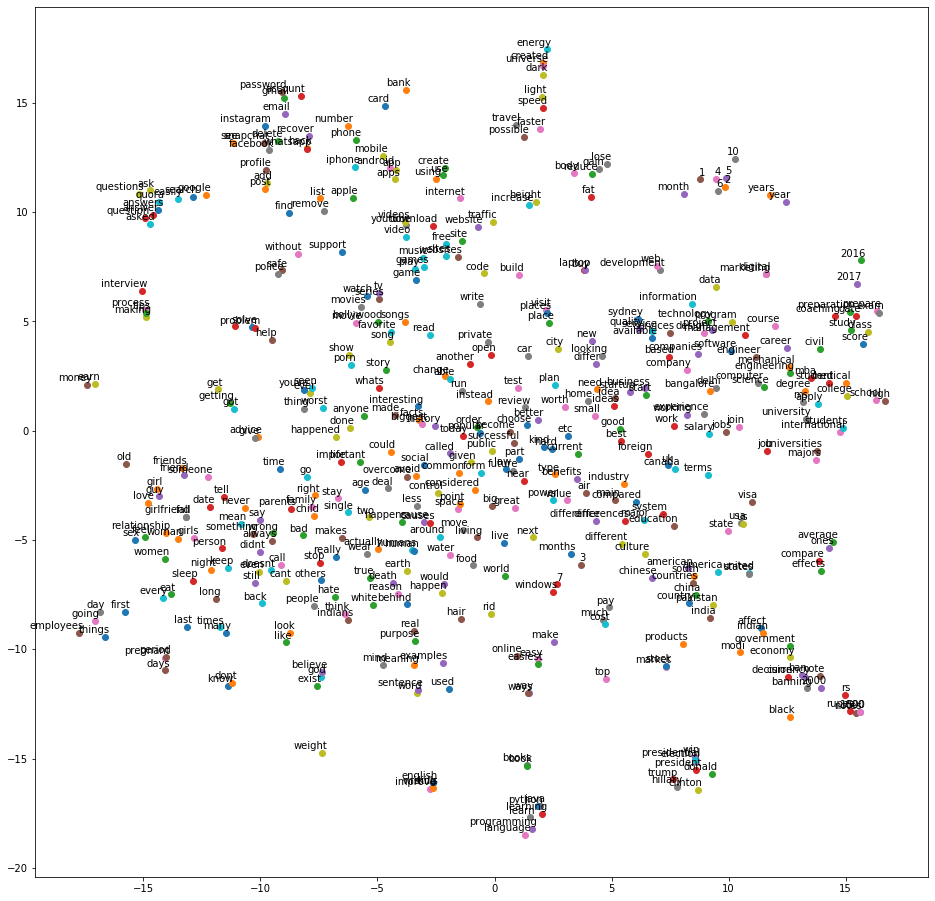

In [12]:
tsne_plot(model)

## Applying on Hotel_reviews

In [14]:
dataset = pd.read_csv('hotel_reviews.csv', sep=';', index_col='Unnamed: 0')
dataset.head(5)

,reviews.rating,reviews.text
0,3,"This hotel was nice and quiet. Did not know, t..."
1,4,We stayed in the king suite with the separatio...
2,3,"Parking was horrible, somebody ran into my ren..."
3,5,Not cheap but excellent location. Price is som...
4,2,If you get the room that they advertised on th...


In [15]:
dataset = dataset.dropna(how="any")
dataset = clean_dataframe(dataset, cols = ['reviews.text'])
dataset.head(5)

,reviews.rating,reviews.text
0,3,nice quiet know train track near train passed ...
1,4,stayed king suite separation bedroom living sp...
2,3,parking horrible somebody ran rental car stayi...
3,5,cheap excellent location price somewhat standa...
4,2,get room advertised website paid may luckyif s...


In [18]:
corpus_hotel = build_corpus(dataset, cols = ['reviews.text'])        
corpus_hotel[0]

['nice',
 'quiet',
 'know',
 'train',
 'track',
 'near',
 'train',
 'passed',
 'stay',
 'best',
 'western',
 'changed',
 'classification',
 'plus',
 'category']

In [23]:
model_hotel = word2vec.Word2Vec(corpus_hotel, size=100, window=20, min_count=200, workers=4)
model_hotel.wv['king']

array([ 0.6906048 , -0.29340616, -0.27194253, -1.2884597 ,  0.57733506,
        0.58319956,  1.3619293 , -0.64084065, -0.0947803 , -0.04344041,
        0.71301275, -0.02042893,  0.571102  , -0.1263349 ,  0.62267685,
       -0.21299306, -0.2932454 , -1.1018541 , -0.9522508 , -1.1546346 ,
        0.0311606 , -0.34120655,  0.27717853,  0.81284374, -0.4024898 ,
       -1.5693928 , -0.8370101 ,  0.11512259,  0.20622116, -0.13864027,
        1.2757754 ,  0.941464  ,  1.8646425 , -0.4352695 ,  0.6764251 ,
       -1.0296054 , -0.8814041 , -0.6514325 , -0.2524346 ,  0.5676047 ,
        0.09148405, -1.0584159 ,  0.8473366 , -0.85556144, -0.76439655,
        0.16957204,  0.31719312,  1.5786436 , -0.48848975,  0.29705697,
        0.65313613,  0.964249  ,  0.8106882 ,  0.6657487 ,  0.47073695,
        1.2618054 , -0.05589211,  0.2870928 ,  1.4864376 ,  0.559968  ,
       -0.8094335 ,  0.132824  ,  0.03325811, -1.7928717 ,  0.69564795,
        0.36210647, -0.24502487,  0.17261323, -0.9056303 ,  0.11

/Users/nathanamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


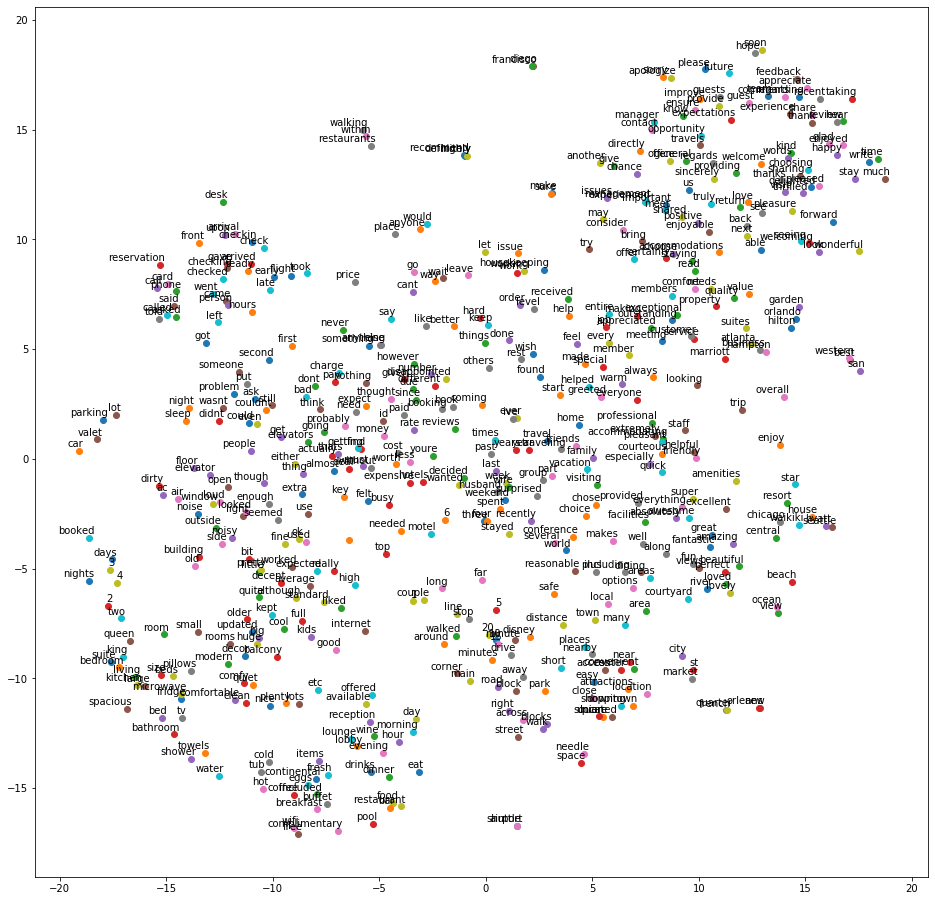

In [20]:
tsne_plot(model_hotel)

In [21]:
model_hotel.wv.similar_by_word('staff')

[('accommodating', 0.8347398042678833),
 ('helpful', 0.8144243359565735),
 ('pleasant', 0.7857611179351807),
 ('especially', 0.7473688125610352),
 ('extremely', 0.7448277473449707),
 ('professional', 0.7327316999435425),
 ('courteous', 0.7178449630737305),
 ('everyone', 0.6888654232025146),
 ('friendly', 0.6525920629501343),
 ('always', 0.6376996040344238)]

In [24]:
corpus_hotel[0]

['nice',
 'quiet',
 'know',
 'train',
 'track',
 'near',
 'train',
 'passed',
 'stay',
 'best',
 'western',
 'changed',
 'classification',
 'plus',
 'category']

In [25]:
def build_vect(index):
    vector = np.zeros(100)
    for word in corpus_hotel[index]:
        if(word in model_hotel.wv.vocab):
            vector += model_hotel.wv[word]
    return vector

In [26]:
vector_3 = build_vect(0)
vector_3

array([ 6.74154326e-01,  1.90915045e+00,  4.04232687e-01,  3.94821953e+00,
       -4.02435121e-01,  4.27556148e+00, -3.16943593e+00,  2.39478036e+00,
       -8.46177937e-01, -1.76936106e+00,  8.66217561e-01, -4.76804972e-01,
       -7.89001100e-02,  3.11721601e-01, -4.15199101e-02, -4.79397805e+00,
        6.20978248e+00,  3.12665886e+00, -8.56634207e-01, -6.89431861e-01,
       -6.85671130e+00,  6.03386479e+00,  3.40182555e+00, -2.70070033e+00,
       -1.34159792e-01,  1.10631666e+00, -3.44105620e+00, -2.19340938e+00,
        4.36480825e+00,  1.23110313e+00,  3.81960638e+00,  1.34519513e+00,
       -3.12987626e+00, -1.90237810e+00, -1.06644385e+00, -3.87557685e-01,
        6.77538007e-01,  3.57794502e+00, -1.54280505e+00, -6.22458372e+00,
        4.96081681e+00, -9.98075604e-02, -1.06301781e+00,  3.25792665e+00,
        8.67919914e-01, -1.16678673e+00, -9.95044798e-01, -4.97091641e+00,
        2.78841816e+00, -8.24777782e-03,  1.56878599e+00, -4.52757469e+00,
       -3.32032122e-01, -

In [27]:
model_hotel.wv.similar_by_vector(vector_3)

[('western', 0.8229432106018066),
 ('value', 0.8020133376121521),
 ('plus', 0.7874451875686646),
 ('best', 0.7587102651596069),
 ('amenities', 0.6753343343734741),
 ('pleased', 0.6514015793800354),
 ('choosing', 0.6336104869842529),
 ('providing', 0.6277744770050049),
 ('near', 0.6222494840621948),
 ('sharing', 0.5919982194900513)]

In [28]:
vector_4 = build_vect(1)
model_hotel.wv.similar_by_vector(vector_4)

[('huge', 0.8749959468841553),
 ('big', 0.8341277241706848),
 ('size', 0.8268407583236694),
 ('king', 0.8246714472770691),
 ('living', 0.8033672571182251),
 ('plenty', 0.7943071722984314),
 ('bedroom', 0.7914899587631226),
 ('bed', 0.7905969619750977),
 ('beds', 0.7891403436660767),
 ('kitchen', 0.7811914682388306)]

In [29]:
vector_5 = build_vect(3)
model_hotel.wv.similar_by_vector(vector_5)

[('included', 0.8362120389938354),
 ('continental', 0.8325410485267639),
 ('nice', 0.7872761487960815),
 ('microwave', 0.7818448543548584),
 ('plenty', 0.7744937539100647),
 ('average', 0.7479289770126343),
 ('coffee', 0.7425308227539062),
 ('fridge', 0.74027419090271),
 ('wifi', 0.7397449016571045),
 ('standard', 0.7376991510391235)]

In [30]:
vector_2 = build_vect(4)
model_hotel.wv.similar_by_vector(vector_2)

[('bit', 0.8221410512924194),
 ('pretty', 0.8129182457923889),
 ('ok', 0.8126647472381592),
 ('although', 0.7822901010513306),
 ('fine', 0.7796052694320679),
 ('though', 0.7680200338363647),
 ('decent', 0.7610460519790649),
 ('money', 0.7590644359588623),
 ('good', 0.7405285835266113),
 ('use', 0.7378274202346802)]

In [31]:
vector_1 = build_vect(9)
model_hotel.wv.similar_by_vector(vector_1)

[('motel', 0.7761701345443726),
 ('6', 0.7630763053894043),
 ('deal', 0.7441470623016357),
 ('couple', 0.7437658905982971),
 ('probably', 0.7322522401809692),
 ('thought', 0.7175650596618652),
 ('almost', 0.7141605019569397),
 ('thing', 0.6916475892066956),
 ('far', 0.6846649646759033),
 ('must', 0.6825083494186401)]